# Titanic

Predict survival on the Titanic and get familiar with ML basics

https://www.kaggle.com/competitions/titanic/overview

Kaggle Profile: https://www.kaggle.com/remyflatt

Achieves: 75% accuracy on test data


# Helper functions

In [454]:
# Import helper functions from my github
!wget https://raw.githubusercontent.com/remz99/Kaggle/main/helper_functions.py

from helper_functions import plot_loss_curves, save_model_to_drive

--2023-03-04 07:49:42--  https://raw.githubusercontent.com/remz99/Kaggle/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1029 (1.0K) [text/plain]
Saving to: ‘helper_functions.py.6’

helper_functions.py 100%[===================>]   1.00K  --.-KB/s    in 0s      

2023-03-04 07:49:42 (69.0 MB/s) - ‘helper_functions.py.6’ saved [1029/1029]



# Import Libraries

In [455]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

tf.random.set_seed(42)

# Load Data

In [456]:
DIR_PATH   = "/content/drive/MyDrive/Kaggle/titanic"
TRAIN_PATH = DIR_PATH + "/" + "train.csv"
TEST_PATH  = DIR_PATH + "/" + "test.csv"

In [457]:
train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)

# Exploratory data analysis

In [458]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [459]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [460]:
# Find rows in train data with NA values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

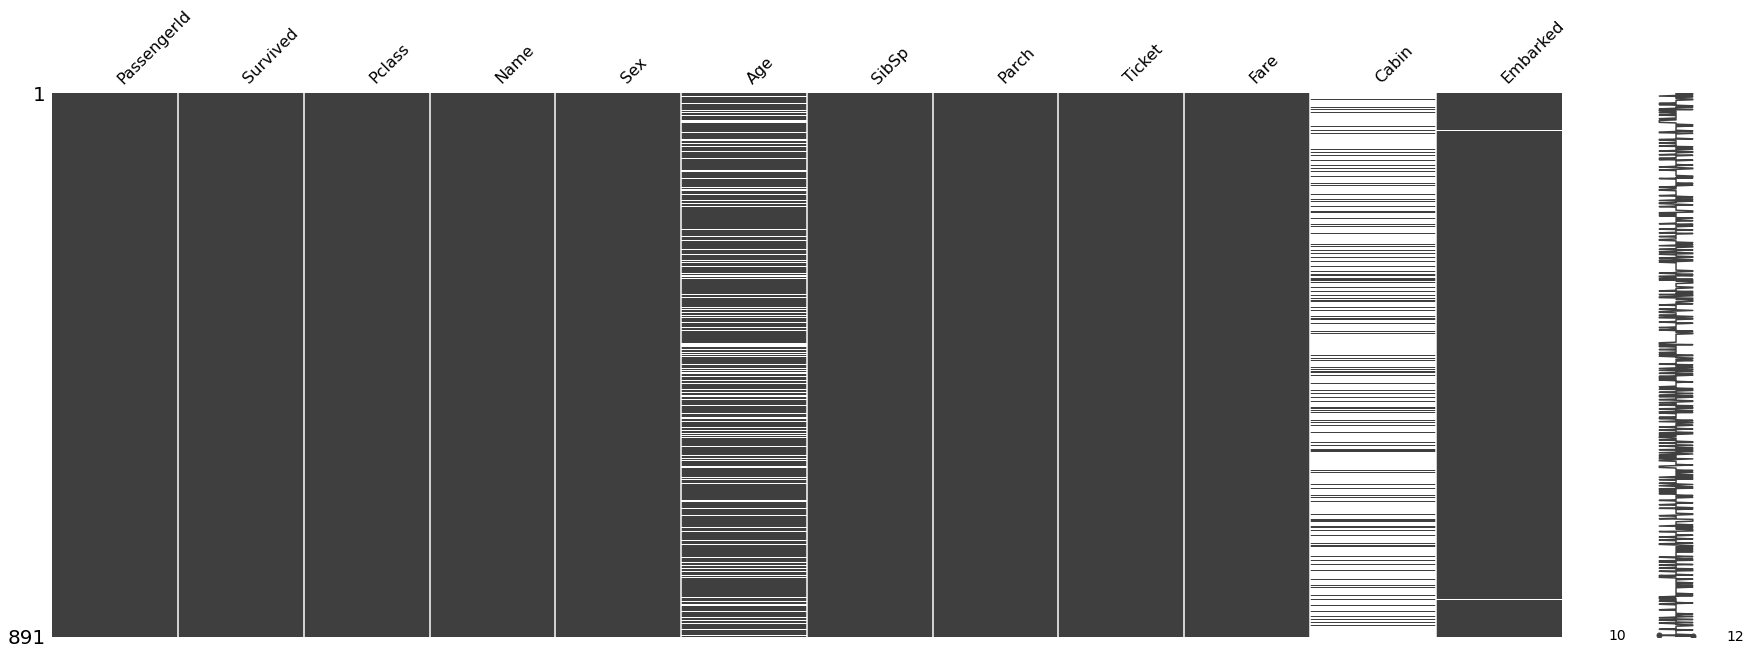

In [461]:
# Plot graphic of missing values for training data
missingno.matrix(train_df, figsize = (30, 10))

In [462]:
# Find rows in test dataw ith NA values
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

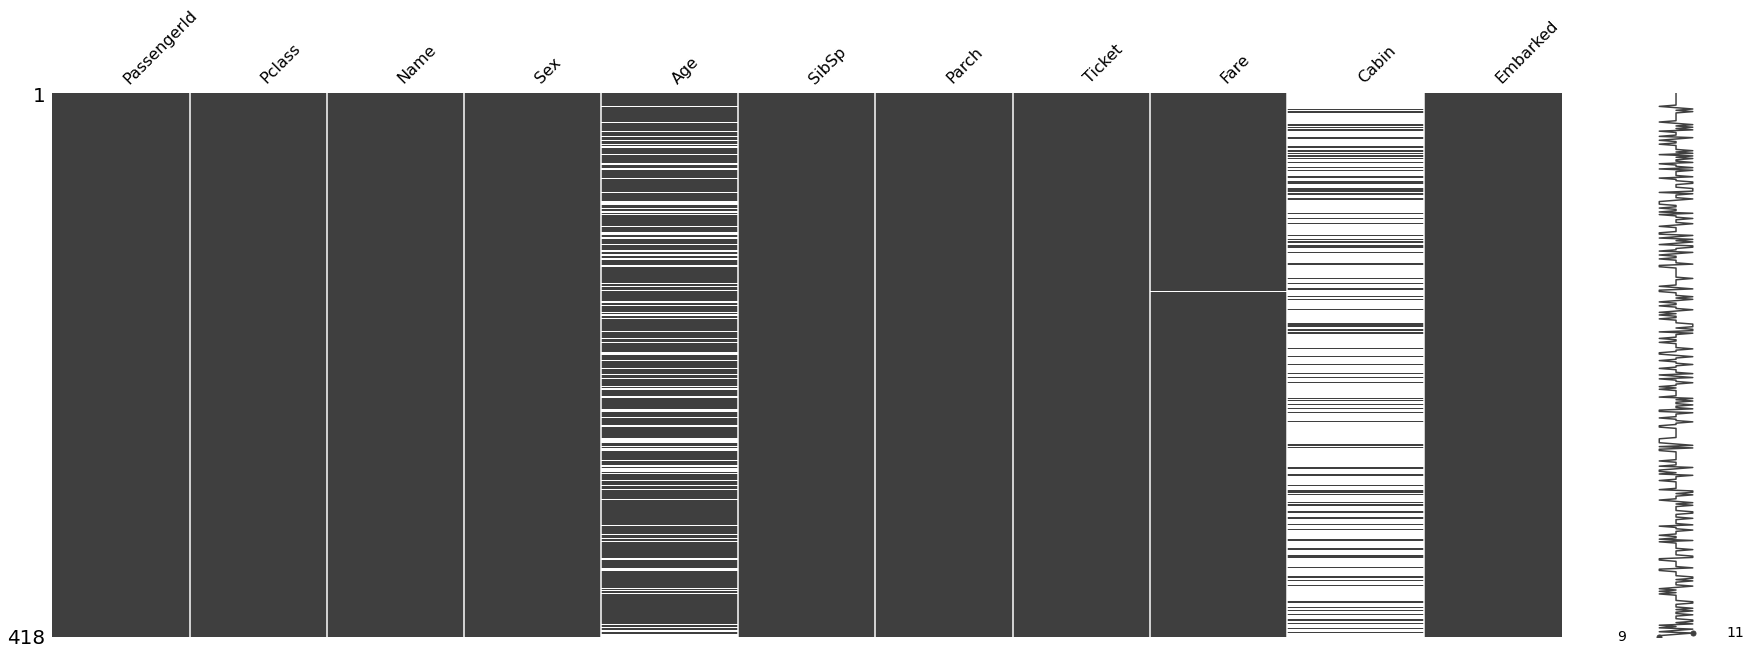

In [463]:
# Plot graphic of missing values for training data
missingno.matrix(test_df, figsize = (30, 10))

Training data has NA values for Age, Cabin and Embarked, while Testing data has NA values for Age, Fare, Cabin. 

In [464]:
# Look at shapes, ndims
print(f"Train Shape: {train_df.shape}")
print(f"Test Shape: {test_df.shape}")

print(f"Train dim: {train_df.ndim}")
print(f"Test dim: {test_df.ndim}")

print(f"Train has nulls: {train_df.isnull().values.any()}")
print(f"Test has nulls: {test_df.isnull().values.any()}")

Train Shape: (891, 12)
Test Shape: (418, 11)
Train dim: 2
Test dim: 2
Train has nulls: True
Test has nulls: True


In [465]:
# Check Datatypes
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Let's look at the other columns

## Survived 

Represents if a passenger in the training data survived or not.

0 = No, 1 = Yes

Dtype: int64

0    549
1    342
Name: Survived, dtype: int64


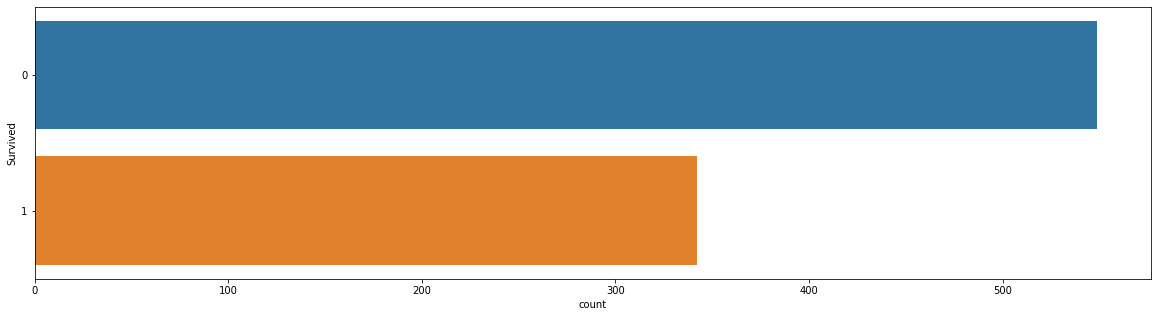

In [466]:
# Plot distribution of Survived Passengers
print(train_df.Survived.value_counts())

plt.figure(figsize=(20, 5))
sns.countplot(y="Survived", data=train_df);

## Sex 

Represents if a passenger is male or female

Dtype: object

male      577
female    314
Name: Sex, dtype: int64


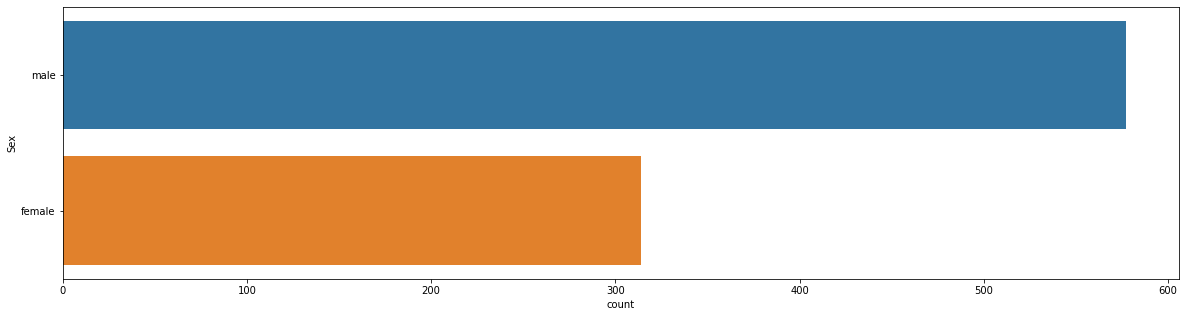

In [467]:
# Plot distribution of Sex
print(train_df.Sex.value_counts())

plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train_df);

## Age 

Represents the age of the passenger.

Dtype: float64

<AxesSubplot:ylabel='Frequency'>

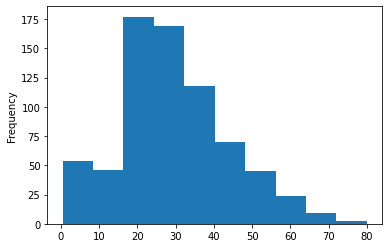

In [468]:
# Plot histogram of Age
train_df.Age.plot.hist()

In [469]:
# Find count of NA Age values
print(f"Train has {train_df.Age.isna().sum()} NA Age values")
print(f"Test has {test_df.Age.isna().sum()} NA Age values")


Train has 177 NA Age values
Test has 86 NA Age values


In [470]:
# Get counts of all the different ages
train_df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [471]:
# Check for NA values
print(train_df.Age.isna().sum())
print(test_df.Age.isna().sum())

177
86


## Fare

Represents the fare a passenger paid.

dtype: float64

In [472]:
# Get counts of each fare value
train_df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [473]:
# Check for NA values
print(train_df.Fare.isna().sum())
print(test_df.Fare.isna().sum())

0
1


## Pclass

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

Dtype: int64

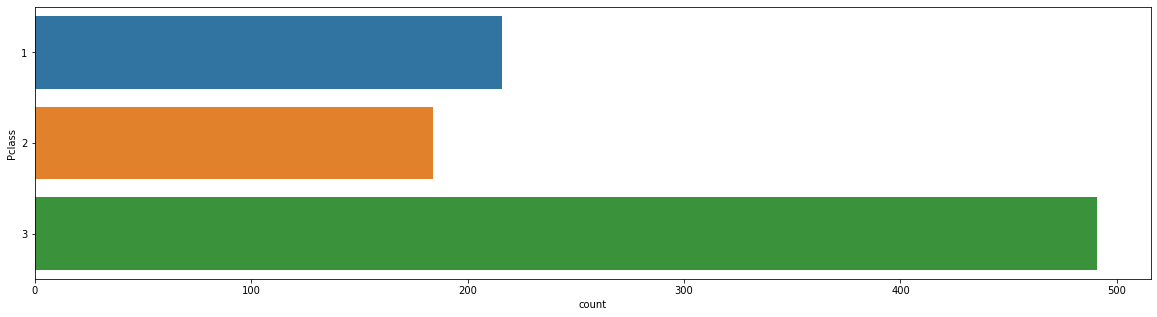

In [474]:
# Get counts of each Pclass value
train_df.Pclass.value_counts()

plt.figure(figsize=(20, 5))
sns.countplot(y="Pclass", data=train_df);

In [475]:
# Check for NA values
print(train_df.Pclass.isna().sum())
print(test_df.Pclass.isna().sum())

0
0


        Survived
Pclass          
1            216
2            184
3            491




Text(0, 0.5, 'Survival Probability')

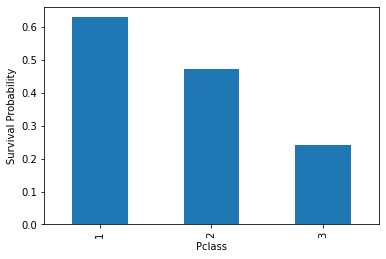

In [476]:
# See if one class had better survival probability
print(train_df[['Pclass', 'Survived']].groupby('Pclass').count())
print("\n")

pclass_survived_plt = train_df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
pclass_survived_plt.set_xlabel('Pclass')
pclass_survived_plt.set_ylabel('Survival Probability')

## SibSp

The count of siblings / spouses aboard the Titanic

Dtype: int64

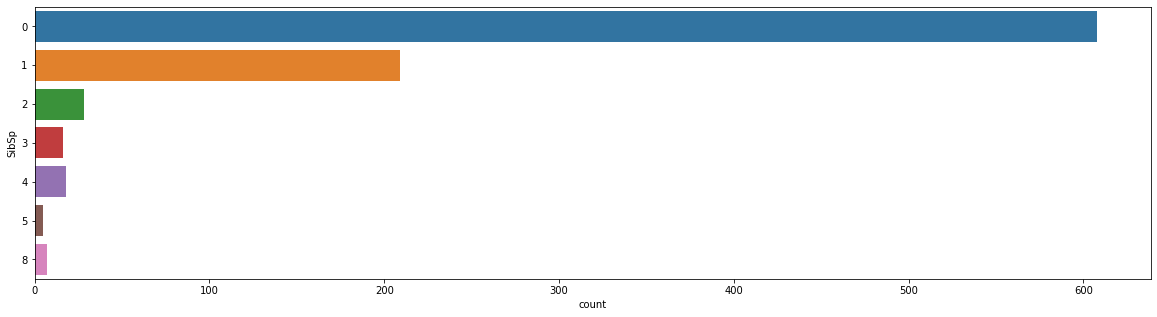

In [477]:
# Get counts of each SibSp value
train_df.SibSp.value_counts()

plt.figure(figsize=(20, 5))
sns.countplot(y="SibSp", data=train_df);

In [478]:
# Check for NA values
print(train_df.SibSp.isna().sum())
print(test_df.SibSp.isna().sum())

0
0


## Name

The name of a passenger.

Dtype: object

In [479]:
train_df.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [480]:
# Check for NA values
print(train_df.Name.isna().sum())
print(test_df.Name.isna().sum())

0
0


## Parch

The number of parents / children aboard the Titanic.

Dtype: int64

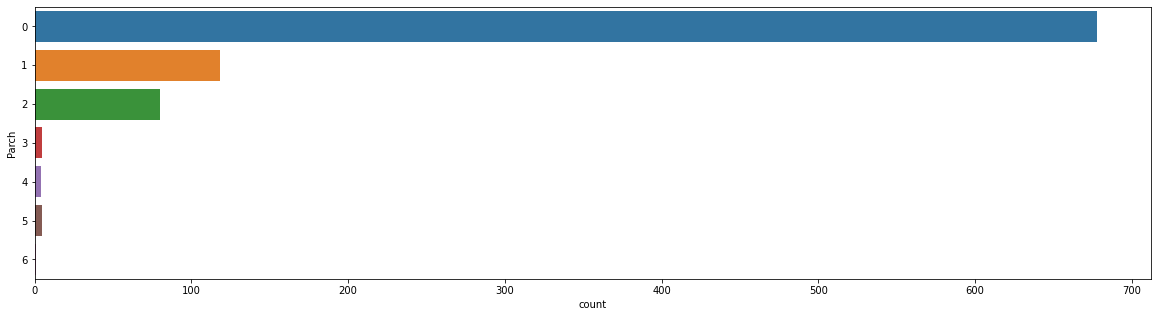

In [481]:
train_df.Parch.value_counts()

plt.figure(figsize=(20, 5))
sns.countplot(y="Parch", data=train_df);

In [482]:
# Check for NA values
print(train_df.Parch.isna().sum())
print(test_df.Parch.isna().sum())

0
0


## Ticket

The Ticket number of the passenger.

Dtype: object

In [483]:
train_df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [484]:
# Check for NA values
print(train_df.Ticket.isna().sum())
print(test_df.Ticket.isna().sum())

0
0


## Cabin

The cabin number of the passenger. 

Dtype: object

In [485]:
train_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [486]:
# Check for NA values
print(train_df.Ticket.isna().sum())
print(test_df.Ticket.isna().sum())

0
0


## Embarked

Port of Embarkation:
* C = Cherbourg
* Q = Queenstown
* S = Southampton

Dtype: {object}

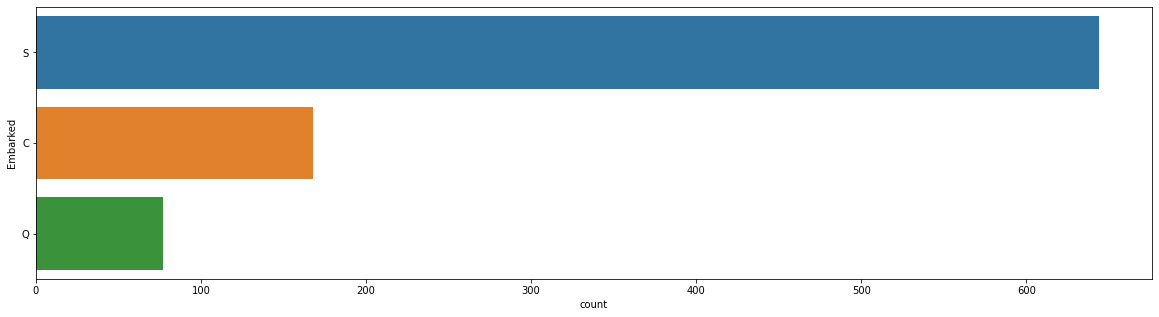

In [487]:
train_df.Embarked.value_counts()

plt.figure(figsize=(20, 5))
sns.countplot(y="Embarked", data=train_df);

In [488]:
# Check for NA values
print(train_df.Embarked.isna().sum())
print(test_df.Embarked.isna().sum())

2
0


## EDA Conclusion

We'll ignore the Ticket, Cabin, Embarked and Name columns from our modelling and testing

# Data Imputation

We need to replace NA values in Age for test and train data and Fare in test data

### Age

Both Training and Test data are missing values for Age. We'll calculate the age for a passenger with missing values by getting the mean for their Sex and Pclass.

#### Training Data

In [489]:
train_mean_ages_by_pbclass = {
    'male': {
        1: train_df[(train_df.Sex == 'male') & (train_df.Pclass == 1)].Age.mean(),
        2: train_df[(train_df.Sex == 'male') & (train_df.Pclass == 2)].Age.mean(),
        3: train_df[(train_df.Sex == 'male') & (train_df.Pclass == 3)].Age.mean()
    },
    'female': {
        1: train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)].Age.mean(),
        2: train_df[(train_df.Sex == 'female') & (train_df.Pclass == 2)].Age.mean(),
        3: train_df[(train_df.Sex == 'female') & (train_df.Pclass == 3)].Age.mean()
    },
}

def train_replace_age_na(col):
    Age=col[0]
    Sex=col[1]
    Pclass=col[2]
    
    if pd.isnull(Age):
      return train_mean_ages_by_pbclass[Sex][Pclass]
    else:
      return Age

print(f"The Average age for Males is: {train_df[train_df.Sex == 'male'].Age.mean():.0f}")
print(f"The Average age for Males By Pclass is:\n1: {train_mean_ages_by_pbclass['male'][1]:.0f},\n2: {train_mean_ages_by_pbclass['male'][2]:.0f},\n3: {train_mean_ages_by_pbclass['male'][3]:.0f}\n")

print(f"The Average age for Female is: {train_df[train_df.Sex == 'female'].Age.mean():.0f}")
print(f"The Average age for Females By Pclass is:\n1: {train_mean_ages_by_pbclass['female'][1]:.0f},\n2: {train_mean_ages_by_pbclass['female'][2]:.0f},\n3: {train_mean_ages_by_pbclass['female'][3]:.0f}")


The Average age for Males is: 31
The Average age for Males By Pclass is:
1: 41,
2: 31,
3: 27

The Average age for Female is: 28
The Average age for Females By Pclass is:
1: 35,
2: 29,
3: 22


In [490]:
# Fill missing values
train_df.Age = train_df[['Age', 'Sex', 'Pclass']].apply(train_replace_age_na, axis=1)

In [491]:
# Cast Age values from int64 to float32
train_df.Age = train_df.Age.astype('float32')

#### Test Data

In [492]:
test_mean_ages_by_pbclass = {
    'male': {
        1: test_df[(test_df.Sex == 'male') & (test_df.Pclass == 1)].Age.mean(),
        2: test_df[(test_df.Sex == 'male') & (test_df.Pclass == 2)].Age.mean(),
        3: test_df[(test_df.Sex == 'male') & (test_df.Pclass == 3)].Age.mean()
    },
    'female': {
        1: test_df[(test_df.Sex == 'female') & (test_df.Pclass == 1)].Age.mean(),
        2: test_df[(test_df.Sex == 'female') & (test_df.Pclass == 2)].Age.mean(),
        3: test_df[(test_df.Sex == 'female') & (test_df.Pclass == 3)].Age.mean()
    },
}

def test_replace_age_na(col):
    Age=col[0]
    Sex=col[1]
    Pclass=col[2]
    
    if pd.isnull(Age):
      return test_mean_ages_by_pbclass[Sex][Pclass]
    else:
      return Age

print(f"The Average age for Males is: {test_df[test_df.Sex == 'male'].Age.mean():.0f}")
print(f"The Average age for Males By Pclass is:\n1: {test_mean_ages_by_pbclass['male'][1]:.0f},\n2: {test_mean_ages_by_pbclass['male'][2]:.0f},\n3: {test_mean_ages_by_pbclass['male'][3]:.0f}\n")

print(f"The Average age for Female is: {test_df[test_df.Sex == 'female'].Age.mean():.0f}")
print(f"The Average age for Females By Pclass is:\n1: {test_mean_ages_by_pbclass['female'][1]:.0f},\n2: {test_mean_ages_by_pbclass['female'][2]:.0f},\n3: {test_mean_ages_by_pbclass['female'][3]:.0f}")


The Average age for Males is: 30
The Average age for Males By Pclass is:
1: 41,
2: 31,
3: 25

The Average age for Female is: 30
The Average age for Females By Pclass is:
1: 41,
2: 24,
3: 23


In [493]:
# Fill missing values
test_df.Age = test_df[['Age', 'Sex', 'Pclass']].apply(test_replace_age_na, axis=1)

In [494]:
# Cast Age values from int64 to float32
test_df.Age = test_df.Age.astype('float32')

### Fare


In [495]:
# Confirm that only the test data has missing values
train_df.Fare.isna().sum(), test_df.Fare.isna().sum()

(0, 1)

In [496]:
# Create a Hash with the mean of Fare by Sex and Pclass for the test data
mean_fares_by_pbclass = {
    'male': {
        1: test_df[(test_df.Sex == 'male') & (test_df.Pclass == 1)].Fare.mean(),
        2: test_df[(test_df.Sex == 'male') & (test_df.Pclass == 2)].Fare.mean(),
        3: test_df[(test_df.Sex == 'male') & (test_df.Pclass == 3)].Fare.mean()
    },
    'female': {
        1: test_df[(test_df.Sex == 'female') & (test_df.Pclass == 1)].Fare.mean(),
        2: test_df[(test_df.Sex == 'female') & (test_df.Pclass == 2)].Fare.mean(),
        3: test_df[(test_df.Sex == 'female') & (test_df.Pclass == 3)].Fare.mean()
    },
}

# Replace NA Fare values with the mean for the sex and pclass of the passenger
def replace_fare_na(col):
    Fare=col[0]
    Sex=col[1]
    Pclass=col[2]
    
    if pd.isna(Fare):
      return mean_fares_by_pbclass[Sex][Pclass]
    else:
      return Fare


print(f"The Average fare for Males is: {test_df[test_df.Sex == 'male'].Fare.mean():.0f}")
print(f"The Average fare for Males By Pclass is:\n1: {mean_fares_by_pbclass['male'][1]:.0f},\n2: {mean_fares_by_pbclass['male'][2]:.0f},\n3: {mean_fares_by_pbclass['male'][3]:.0f}\n")

print(f"The Average fare for Female is: {test_df[test_df.Sex == 'female'].Fare.mean():.0f}")
print(f"The Average fare for Females By Pclass is:\n1: {mean_fares_by_pbclass['female'][1]:.0f},\n2: {mean_fares_by_pbclass['female'][2]:.0f},\n3: {mean_fares_by_pbclass['female'][3]:.0f}")


The Average fare for Males is: 28
The Average fare for Males By Pclass is:
1: 76,
2: 20,
3: 12

The Average fare for Female is: 50
The Average fare for Females By Pclass is:
1: 116,
2: 26,
3: 14


In [497]:
# Replace NA values in test data with the mean for the sex and class of the passenger
test_df.Fare = test_df[['Fare', 'Sex', 'Pclass']].apply(replace_fare_na, axis=1)

In [498]:
# Cast Fare values from float64 to float32
train_df.Fare = train_df.Fare.astype('float32')
test_df.Fare = test_df.Fare.astype('float32')

# Create validation data

In [499]:
# Columns which we will use to build our model with
TRAIN_COLUMNS = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']
train_df = train_df[TRAIN_COLUMNS]

In [500]:
# Columns which we will use to build our predictions with
TEST_COLUMNS = ['PassengerId', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']
test_df = test_df[TEST_COLUMNS]

In [501]:
# Split train_df into train_data(80% of train_df) and val_data(20% of train_df)
train_data, val_data = np.split(train_df.sample(frac=1), [int(0.8*len(train_df))])


In [502]:
len(train_data), len(val_data)

(712, 179)

In [503]:
print(train_data.shape, val_data.shape)

(712, 7) (179, 7)


# Data Pipeline Setup

Uses https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers as a guide

## Create an input pipeline using tf.data

In [504]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32, inference=False):
  df = dataframe.copy()
  
  if inference == False: 
    labels = df.pop('Survived')
  
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}

  if inference == False:
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
  else:
    ds = tf.data.Dataset.from_tensor_slices((df))

  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  
  return ds

In [505]:
train_dataset = df_to_dataset(train_data, batch_size=5)

[(train_features, label_batch)] = train_dataset.take(1)

<ipython-input-504-8710172290a2>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [506]:
train_dataset.element_spec

({'Survived': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None),
  'Sex': TensorSpec(shape=(None, 1), dtype=tf.string, name=None),
  'Pclass': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None),
  'SibSp': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None),
  'Parch': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None),
  'Fare': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  'Age': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)},
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

## Create Layers

### Numerical columns

Use a tf.keras.layers.Normalization layer to standardize the distribution of the data.

In [507]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [508]:
# Test normalizer on Fare data
feature_name = 'Fare'

fare_count_col = train_features[feature_name]
layer = get_normalization_layer(feature_name, train_dataset)
layer(fare_count_col)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-0.37960082],
       [-0.37960082],
       [-0.13090856],
       [-0.479556  ],
       [ 1.6673279 ]], dtype=float32)>

### Categorical columns

Define another new utility function that returns a layer which maps values from a vocabulary to integer indices and multi-hot encodes the features using the tf.keras.layers.StringLookup, tf.keras.layers.IntegerLookup, and tf.keras.CategoryEncoding preprocessing layers:

In [509]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [510]:
# Test with Pclass column
feature_name = 'Pclass'

test_type_col = train_features[feature_name]
test_type_layer = get_category_encoding_layer(name=feature_name,
                                              dataset=train_dataset,
                                              dtype='int')
test_type_layer(test_type_col)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

## Create Model Callbacks

In [511]:
def create_checkpoint_callback(filepath, save_weights_only=True, save_best_only=True):
  return tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                            save_weights_only=save_weights_only,
                                            save_best_only=save_best_only,
                                            monitor="val_accuracy",
                                            verbose=1)

def create_early_stopping_callback(patience=3):
  return tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                         patience=patience,
                                         verbose=1)
  
def create_reduce_lr_callback():
  return tf.keras.callbacks.ReduceLROnPlateau(verbose=1)

## Create Datasets

In [512]:
BATCH_SIZE    = 256
train_dataset = df_to_dataset(train_data, batch_size=BATCH_SIZE)
val_dataset   = df_to_dataset(val_data, shuffle=False, batch_size=BATCH_SIZE)
test_dataset  = df_to_dataset(test_df, shuffle=False, batch_size=BATCH_SIZE, inference=True)

[(train_features, label_batch)] = train_dataset.take(1)

<ipython-input-504-8710172290a2>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


## Preprocess selected features to train the model on

In [513]:
all_inputs = []
encoded_features = []

In [514]:
# Normalize numerical features
for header in ['Fare', 'Age']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_dataset)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [515]:
# Encode Integer value columns
for header in ['Pclass', 'SibSp', 'Parch']:
  integer_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_dataset,
                                               dtype='int')
  encoded_integer_col = encoding_layer(integer_col)
  all_inputs.append(integer_col)
  encoded_features.append(encoded_integer_col)


In [516]:
# Encode String values in columns
for header in ['Sex']:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_dataset,
                                               dtype='string')
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

# Model 1

Create a Sequential Model using the features to predict if a Passenger Survived or not



In [517]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(100, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(10, activation="relu")(all_features)

output = tf.keras.layers.Dense(1)(x)

model1 = tf.keras.Model(all_inputs, output)

## Compile and Train Model

In [518]:
model1.compile(
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)


In [519]:
model1_history = model1.fit(
    train_dataset, 
    epochs=200, 
    validation_data=val_dataset,
    callbacks=[
      create_checkpoint_callback(model1.name), 
      create_reduce_lr_callback()
    ]
  )


Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['Survived'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


1/3 [=========>....................] - ETA: 2s - loss: 0.6958 - accuracy: 0.6289
Epoch 1: val_accuracy improved from -inf to 0.62570, saving model to model_8
3/3 [==============================] - 2s 179ms/step - loss: 0.7089 - accuracy: 0.6124 - val_loss: 0.7146 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 0.7190 - accuracy: 0.5898
Epoch 2: val_accuracy did not improve from 0.62570
3/3 [==============================] - 0s 15ms/step - loss: 0.7036 - accuracy: 0.6138 - val_loss: 0.7091 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6839 - accuracy: 0.6523
Epoch 3: val_accuracy did not improve from 0.62570
3/3 [==============================] - 0s 15ms/step - loss: 0.6984 - accuracy: 0.6138 - val_loss: 0.7036 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6865 - accuracy: 0.6211
Epoch 4: val_accuracy did not improve

## Analyze Model

In [520]:
model1.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Pclass (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 SibSp (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 Parch (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 Sex (InputLayer)               [(None, 1)]          0           []                               
                                                                                            

In [521]:
# Clone and create model with the best weights
model1.load_weights(model1.name)

model1.compile(
  loss=tf.keras.losses.binary_crossentropy,
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)


In [522]:
model1_loss, model1_accuracy = model1.evaluate(val_dataset)
print(f"Model loss on the validation set: {model1_loss:.2f}")
print(f"Model accuracy on the validation set: {100*model1_accuracy:.2f}%")

1/1 [==============================] - 1s 540ms/step - loss: 2.1688 - accuracy: 0.8268
Model loss on the validation set: 2.17
Model accuracy on the validation set: 82.68%


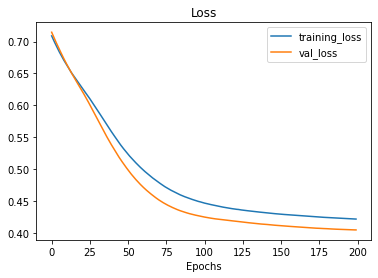

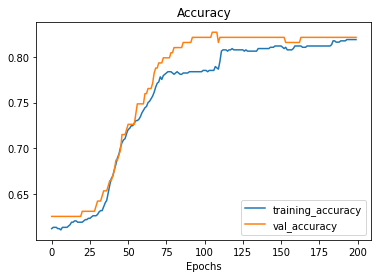

In [523]:
plot_loss_curves(model1_history)

# Model 2

This time we'll exclude SibSp and Parch from training

In [524]:
all_inputs = []
encoded_features = []

In [525]:
# Normalize numerical features
for header in ['Fare', 'Age']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_dataset)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [526]:
# Encode Integer value columns
for header in ['Pclass']:
  integer_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_dataset,
                                               dtype='int')
  encoded_integer_col = encoding_layer(integer_col)
  all_inputs.append(integer_col)
  encoded_features.append(encoded_integer_col)

In [527]:
# Encode String values in columns
for header in ['Sex']:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_dataset,
                                               dtype='string')
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [528]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(100, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(10, activation="relu")(all_features)

output = tf.keras.layers.Dense(1)(x)

model2 = tf.keras.Model(all_inputs, output)

## Compile and Train Model

In [529]:
model2.compile(
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)


In [530]:
model2_history = model2.fit(
    train_dataset, 
    epochs=200, 
    validation_data=val_dataset,
    callbacks=[
      create_checkpoint_callback(model2.name), 
      create_reduce_lr_callback()
    ]
  )


Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['Survived', 'SibSp', 'Parch'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


1/3 [=========>....................] - ETA: 3s - loss: 0.6722 - accuracy: 0.6172
Epoch 1: val_accuracy improved from -inf to 0.62570, saving model to model_9
3/3 [==============================] - 2s 145ms/step - loss: 0.6743 - accuracy: 0.6138 - val_loss: 0.6612 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6845 - accuracy: 0.6055
Epoch 2: val_accuracy did not improve from 0.62570
3/3 [==============================] - 0s 14ms/step - loss: 0.6680 - accuracy: 0.6138 - val_loss: 0.6556 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6589 - accuracy: 0.6172
Epoch 3: val_accuracy did not improve from 0.62570
3/3 [==============================] - 0s 14ms/step - loss: 0.6622 - accuracy: 0.6138 - val_loss: 0.6502 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6489 - accuracy: 0.6289
Epoch 4: val_accuracy did not improve

## Analyze Model

In [531]:
# Clone and create model with the best weights
model2.load_weights(model2.name)

model2.compile(
  loss=tf.keras.losses.binary_crossentropy,
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)


In [532]:
model2_loss, model2_accuracy = model2.evaluate(val_dataset)
print(f"Model loss on the validation set: {model2_loss:.2f}")
print(f"Model accuracy on the validation set: {100*model2_accuracy:.2f}%")

1/1 [==============================] - 0s 351ms/step - loss: 2.0580 - accuracy: 0.8268
Model loss on the validation set: 2.06
Model accuracy on the validation set: 82.68%


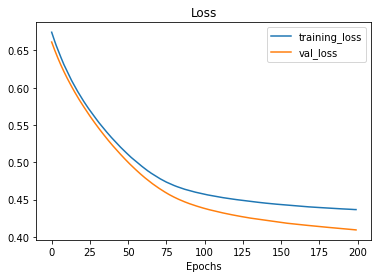

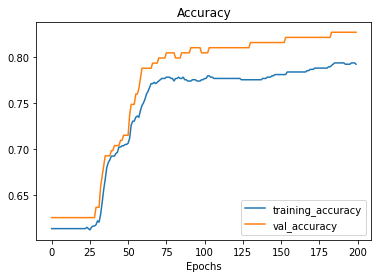

In [533]:
plot_loss_curves(model2_history)

# Compare models

In [534]:
history_data = [
    ['Model1', model1_loss, model1_accuracy],
    ['Model2', model2_loss, model2_accuracy],
]

# Create the pandas DataFrame
pd.DataFrame(history_data, columns=['Name', 'Loss', 'Accuracy'])

,Name,Loss,Accuracy
0,Model1,2.168821,0.826816
1,Model2,2.057985,0.826816


In [535]:
# Save both models to Google Drive
save_model_to_drive('titanic', model1)
save_model_to_drive('titanic', model2)

# Create Test Predictions

Model1 has a slightly better Accuracy against the validation data so we'll use that for predicting the probabilities of our test data.

In [536]:
predictions = model1.predict(test_dataset)
prob = tf.nn.sigmoid(predictions)

# Add a new column to the testing DF where we cast to Bool to int. This will give us
# the Survived value for each passenger in the correct format.
test_df['Survived'] = np.round(prob).astype('int64')

1/2 [==============>...............] - ETA: 0s

/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['PassengerId'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


2/2 [==============================] - 0s 12ms/step


In [537]:
test_df['Survived']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Create Kaggle Submission

In [538]:
SUBMISSION_PATH = "/content/drive/MyDrive/Kaggle/titanic/titanic-submission.csv"

test_df.to_csv(SUBMISSION_PATH, columns=['PassengerId', 'Survived'], index=False)